In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
cluster1 = np.load('../2015-5appliances-true-agg-c1.npy')
cluster2 = np.load('../2015-5appliances-true-agg-c2.npy')
cluster3 = np.load('../2015-5appliances-true-agg-c3.npy')

Text(0.5,1,'Aggregate')

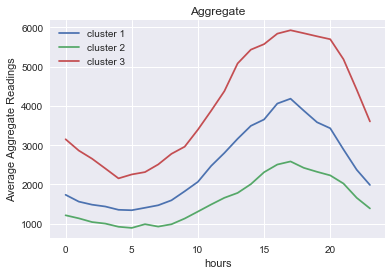

In [119]:
ax = pd.Series(cluster1.mean(axis=0)[0].mean(axis=0)).plot()
pd.Series(cluster2.mean(axis=0)[0].mean(axis=0)).plot(ax=ax)
pd.Series(cluster3.mean(axis=0)[0].mean(axis=0)).plot(ax=ax)
ax.legend(['cluster 1', 'cluster 2', 'cluster 3'])
ax.set_xlabel("hours")
ax.set_ylabel("Average Aggregate Readings")
ax.set_title("Aggregate")

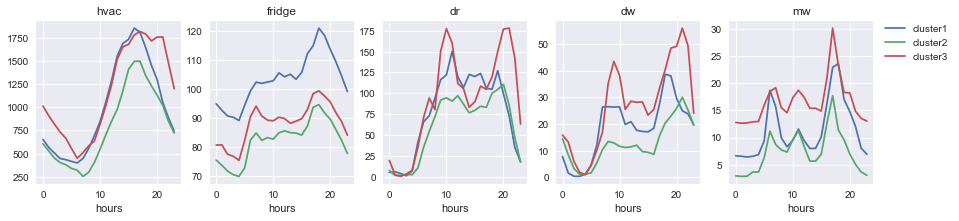

In [144]:
appliance = ['hvac', 'fridge', 'dr', 'dw', 'mw']
fig, axes = plt.subplots(ncols=5, figsize=(15, 3))
ax = axes.flatten()

count = 0
for j in range(1, 6):
    pd.Series(cluster1.mean(axis=0)[j].mean(axis=0)).plot(ax=ax[count])
    pd.Series(cluster2.mean(axis=0)[j].mean(axis=0)).plot(ax=ax[count])
    pd.Series(cluster3.mean(axis=0)[j].mean(axis=0)).plot(ax=ax[count])
    
    ax[count].set_title(appliance[j-1])
    ax[count].set_xlabel("hours")
    count += 1
ax[count-1].legend(["cluster1", "cluster2", "cluster3"] , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


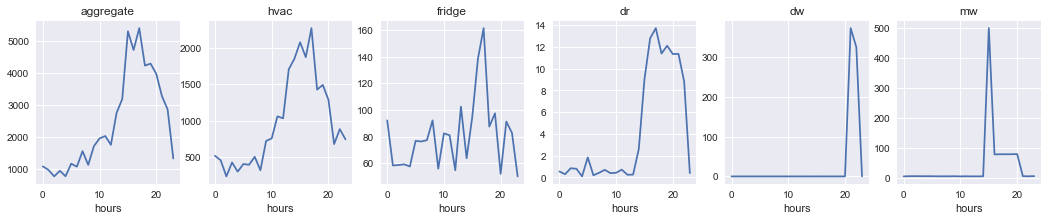

In [159]:
appliance = ['aggregate', 'hvac', 'fridge', 'dr', 'dw', 'mw']
fig, axes = plt.subplots(ncols=6, figsize=(18, 3))
ax = axes.flatten()

count = 0
for j in range(6):
    pd.Series(cluster1[0][j][1]).plot(ax=ax[count])
    
    ax[count].set_title(appliance[j])
    ax[count].set_xlabel("hours")
#     ax[count].set_ylim(0, 5000)
    count += 1


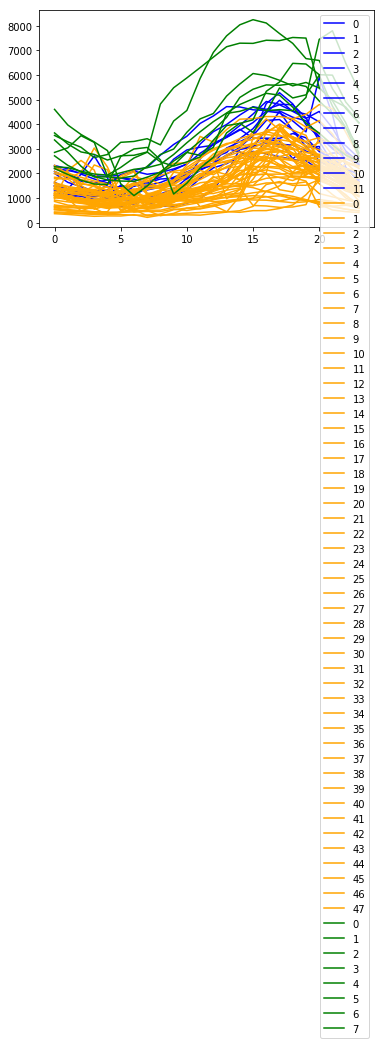

In [47]:
ax = pd.DataFrame(cluster1.mean(axis=2)[:, 0, :]).T.plot(c='blue')
pd.DataFrame(cluster2.mean(axis=2)[:, 0, :]).T.plot(c='orange', ax=ax)
pd.DataFrame(cluster3.mean(axis=2)[:, 0, :]).T.plot(c='green', ax=ax)

In [122]:
true_agg1 = np.zeros([12, 112, 24])
for i in range(1, 6):
    true_agg1 += cluster1[:, i, :, :]
residual1 = (cluster1[:, 0, :, :] - true_agg1).reshape(12, 1, 112,24)
new_cluster1 = np.hstack([cluster1, residual1])

true_agg2 = np.zeros([48, 112, 24])
for i in range(1, 6):
    true_agg2 += cluster2[:, i, :, :]
residual2 = (cluster2[:, 0, :, :] - true_agg2).reshape(48, 1, 112,24)
new_cluster2 = np.hstack([cluster2, residual2])

true_agg3 = np.zeros([8, 112, 24])
for i in range(1, 6):
    true_agg3 += cluster3[:, i, :, :]
residual3 = (cluster3[:, 0, :, :] - true_agg3).reshape(8, 1, 112,24)
new_cluster3 = np.hstack([cluster3, residual3])

In [85]:
df1 = pd.DataFrame(new_cluster1.mean(axis=2).mean(axis=2), columns=['aggregate','hvac', 'fridge', 'dr', 'dw', 'mw', 'residual'])
df2 = pd.DataFrame(new_cluster2.mean(axis=2).mean(axis=2), columns=['aggregate','hvac', 'fridge', 'dr', 'dw', 'mw', 'residual'])
df3 = pd.DataFrame(new_cluster3.mean(axis=2).mean(axis=2), columns=['aggregate','hvac', 'fridge', 'dr', 'dw', 'mw', 'residual'])

In [88]:
df3.corr()

,aggregate,hvac,fridge,dr,dw,mw,residual
aggregate,1.000000,0.773463,0.811494,0.007013,-0.342133,0.669901,0.804909
hvac,0.773463,1.000000,0.749817,-0.010698,-0.180823,0.465454,0.253520
fridge,0.811494,0.749817,1.000000,-0.446531,-0.574839,0.522513,0.593182
dr,0.007013,-0.010698,-0.446531,1.000000,0.727202,-0.282476,-0.085630
dw,-0.342133,-0.180823,-0.574839,0.727202,1.000000,-0.486792,-0.444095
mw,0.669901,0.465454,0.522513,-0.282476,-0.486792,1.000000,0.596268
residual,0.804909,0.253520,0.593182,-0.085630,-0.444095,0.596268,1.000000


Text(0.5,1,'cluster3')

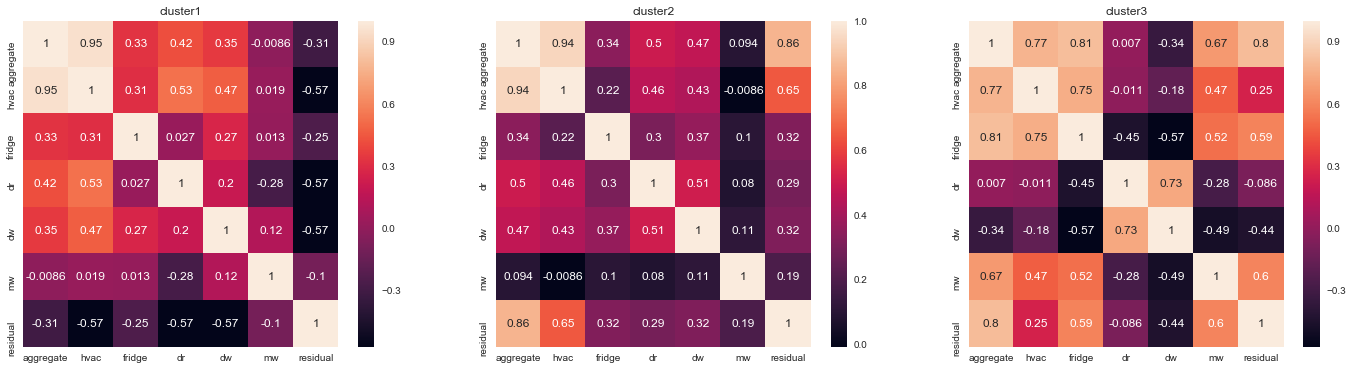

In [142]:
import seaborn as sns; sns.set()
fig, axes = plt.subplots(ncols=3, figsize=(24, 6))
ax = axes.flatten()

sns.heatmap(df1.corr(),  annot=True, ax = ax[0])
ax[0].set_title("cluster1")
sns.heatmap(df2.corr(),  annot=True, ax = ax[1])
ax[1].set_title("cluster2")
sns.heatmap(df3.corr(),  annot=True, ax = ax[2])
ax[2].set_title("cluster3")

(0, 6000)

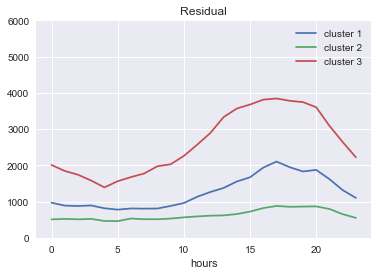

In [120]:
ax = pd.DataFrame(residual1.mean(axis=0).mean(axis=1)).T.plot()
pd.DataFrame(residual2.mean(axis=0).mean(axis=1)).T.plot(ax=ax)
pd.DataFrame(residual3.mean(axis=0).mean(axis=1)).T.plot(ax=ax)

ax.legend(['cluster 1', 'cluster 2', 'cluster 3'])
ax.set_xlabel("hours")
ax.set_title("Residual")
ax.set_ylim(0, 6000)

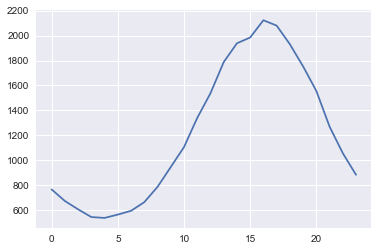

In [128]:
pd.Series(true_agg1.mean(axis=0).mean(axis=0)).plot()

(0, 6000)

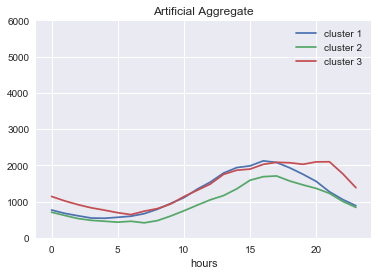

In [130]:
ax = pd.Series(true_agg1.mean(axis=0).mean(axis=0)).plot()
pd.Series(true_agg2.mean(axis=0).mean(axis=0)).plot(ax=ax)
pd.Series(true_agg3.mean(axis=0).mean(axis=0)).plot(ax=ax)
ax.legend(['cluster 1', 'cluster 2', 'cluster 3'])
ax.set_xlabel("hours")
ax.set_title("Artificial Aggregate")
ax.set_ylim(0, 6000)